In [1]:
import sys,os
PROJECT_ROOT=os.environ['HOME']+"\\PycharmProjects\\sports_data"
sys.path.insert(0, PROJECT_ROOT)
import pandas as pd
import numpy as np
from sites.common import sql_utils
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [4]:
scored_df=pd.read_csv("first_year_fantasy.csv")
scored_df.head(5)

,player_id,name,position,bench_reps,broad_jump,cone,shuttle,forty_yd,vertical,draft_pick,draft_round,weight,height,dk_score,10_yd,position_label
0,AbduAm00,Ameer Abdullah,RB,24.0,130.0,6.79,3.95,4.60,42.5,54.0,2.0,205,69.0,121.0,UNK,2
1,AdamDa00,Darvin Adams,WR,0.0,0.0,0.00,0.00,4.56,0.0,0.0,0.0,190,74.0,0.0,UNK,5
2,AdamDa01,Davante Adams,WR,14.0,123.0,6.82,4.30,4.56,39.5,53.0,2.0,212,73.0,103.6,UNK,5
3,AdamJe01,Jerell Adams,TE,0.0,117.0,7.05,4.31,4.64,32.5,184.0,6.0,247,77.0,34.2,UNK,3
4,AdamJo01,Joe Adams,WR,0.0,123.0,7.09,0.00,4.51,36.0,104.0,4.0,179,71.0,3.0,UNK,5


In [17]:
DRAFT_VARS=[
    'isActive',
    'player_id',
 'isHOF',
    'name',
 'position',
 'first_year',
 'last_year',
    'age',
    'gs',
    'year_id',
    'Year',
 'bench_reps',
 'broad_jump',
 'college',
    'cone',
 'draft_pick',
    'draft_round',
    'forty_yd',
 'height',
 'school_name',
 'shuttle',
 'vertical',
 'weight',
 'dk_score',
    'player'
]
DRAFT_KINGS_POSITIONS=["QB","RB","WR","TE"]#FB are boring

In [7]:
scored_df.columns

Index(['player_id', 'name', 'position', 'bench_reps', 'broad_jump', 'cone',
       'shuttle', 'forty_yd', 'vertical', 'draft_pick', 'draft_round',
       'weight', 'height', 'dk_score', '10_yd', 'position_label'],
      dtype='object')

In [9]:
scored_df.groupby("position").describe()

bench_reps  broad_jump        cone    dk_score  draft_pick  \
position                                                                     
LB-RB    count    1.000000    1.000000    1.000000    1.000000    1.000000   
         mean    19.000000  112.000000    7.470000    3.000000    0.000000   
         std           NaN         NaN         NaN         NaN         NaN   
         min     19.000000  112.000000    7.470000    3.000000    0.000000   
         25%     19.000000  112.000000    7.470000    3.000000    0.000000   
         50%     19.000000  112.000000    7.470000    3.000000    0.000000   
         75%     19.000000  112.000000    7.470000    3.000000    0.000000   
         max     19.000000  112.000000    7.470000    3.000000    0.000000   
QB       count  124.000000  124.000000  124.000000  124.000000  124.000000   
         mean     1.000000   85.153226    5.162581   72.213387   74.314516   
         std      4.492089   47.596209    3.192257   92.362662   71.899587   
         min      0.000000    0.000000    0.000000   -1.380000    0.000000   
         25%      0.000000   98.750000    0.000000    1.860000    7.750000   
         50%      0.000000  108.500000    7.000000   28.080000   57.000000   
         75%      0.000000  113.250000    7.170000  111.005000  123.750000   
         max     24.000000  126.000000    7.800000  396.340000  250.000000   
RB       count  320.000000  320.000000  320.000000  320.000000  320.000000   
         mean    15.568750   97.000000    4.162750   68.361938   85.034375   
         std      9.489226   45.513924    3.474606   80.560787   74.691898   
         min      0.000000    0.000000    0.000000   -0.200000    0.000000   
         25%     11.000000  111.000000    0.000000    5.175000    4.000000   
         50%     18.000000  117.000000    6.840000   41.650000   73.500000   
         75%     22.000000  121.000000    7.080000  104.050000  139.250000   
         max     32.000000  135.000000    7.590000  400.600000  250.000000   
TE       count  208.000000  208.000000  208.000000  208.000000  208.000000   
         mean    16.668269   91.778846    5.122163   31.484615   94.610577   
         std      9.550808   46.529084    3.237900   39.109344   74.501612   
         min      0.000000    0.000000    0.000000    0.000000    0.000000   
         25%     14.750000  107.000000    0.000000    1.800000   29.500000   
         50%     19.000000  113.000000    6.990000   14.950000   89.500000   
         75%     23.000000  118.000000    7.215000   44.925000  154.250000   
         max     38.000000  131.000000    8.090000  181.400000  255.000000   
TE-FB    count    1.000000    1.000000    1.000000    1.000000    1.000000   
         mean    27.000000  122.000000    7.000000    4.900000  222.000000   
         std           NaN         NaN         NaN         NaN         NaN   
         min     27.000000  122.000000    7.000000    4.900000  222.000000   
         25%     27.000000  122.000000    7.000000    4.900000  222.000000   
         50%     27.000000  122.000000    7.000000    4.900000  222.000000   
         75%     27.000000  122.000000    7.000000    4.900000  222.000000   
         max     27.000000  122.000000    7.000000    4.900000  222.000000   
WR       count  432.000000  432.000000  432.000000  432.000000  432.000000   
         mean     6.444444   93.497685    4.395000   58.073981   85.453704   
         std      7.975407   50.937248    3.345234   68.464681   71.474479   
         min      0.000000    0.000000    0.000000   -0.400000    0.000000   
         25%      0.000000  110.000000    0.000000    6.075000   23.000000   
         50%      0.000000  119.000000    6.770000   29.600000   76.000000   
         75%     14.000000  123.000000    6.970000   94.675000  128.000000   
         max     27.000000  139.000000    7.540000  472.300000  253.000000   
WR-PR    count    1.000000    1.000000    1.000000    1.000000    1.000000   
         mean    16.000000  124.000000

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
scored_df.head(1)

,player_id,name,position,bench_reps,broad_jump,cone,shuttle,forty_yd,vertical,draft_pick,draft_round,weight,height,dk_score
0,AbduAm00,Ameer Abdullah,RB,24.0,130.0,6.79,3.95,4.6,42.5,54.0,2.0,205,69.0,121.0


In [12]:
names=['Sammy Watkins','Hakeem Nicks','Rueben Randle', 'Dwayne Bowe','Jordy Nelson']
cols=['name','height','weight','10_yd','forty_yd','vertical','broad_jump','shuttle']
scored_df['10_yd']='UNK'
scored_df[scored_df['name'].isin(names)][cols]#.set_index("name")#.ix[names]#[['height','weight','forty_yd','vertical','broad_jump','shuttle']]

,name,height,weight,10_yd,forty_yd,vertical,broad_jump,shuttle
90,Dwayne Bowe,74.0,221,UNK,4.51,33.0,125.0,4.35
701,Jordy Nelson,75.0,217,UNK,4.51,31.0,123.0,4.35
705,Hakeem Nicks,73.0,212,UNK,4.51,36.0,0.0,0.00
788,Rueben Randle,75.0,210,UNK,4.55,31.0,121.0,4.36
1002,Sammy Watkins,73.0,211,UNK,4.43,34.0,126.0,4.34


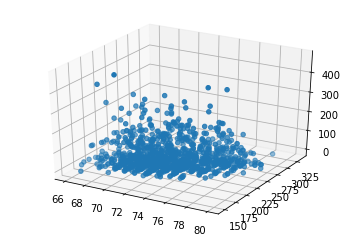

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scored_df['height'], scored_df['weight'], zs=scored_df['dk_score'])

In [14]:
features=['position',
           'bench_reps','broad_jump','cone',
           'shuttle','forty_yd','vertical','weight','height']
target=["dk_score"]

C:\Users\Roger\Anaconda2\envs\py3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


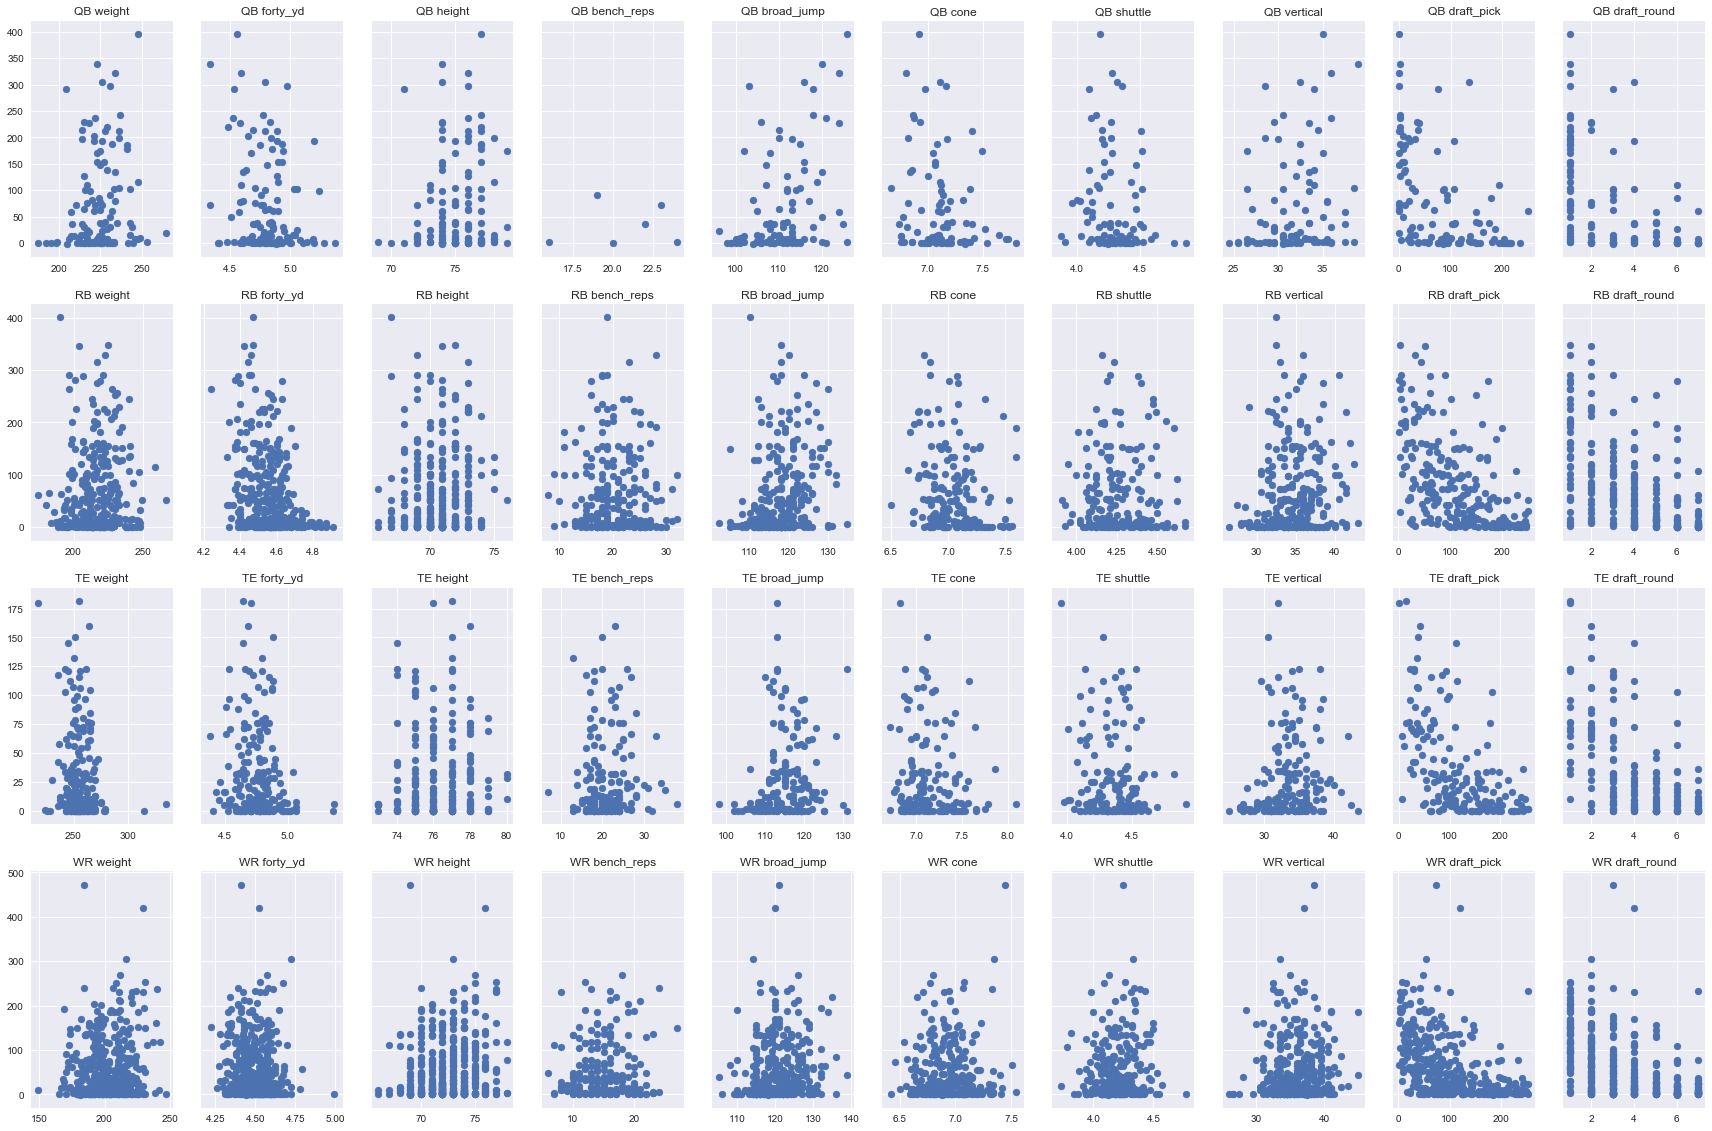

In [18]:
from pandas.stats.api import ols
df=scored_df.copy()
#df=df.loc[(df>0).all(axis=1)]
col_subset=['weight','forty_yd',"height",'bench_reps','broad_jump','cone','shuttle','vertical','draft_pick','draft_round']
i=0

f, axes = plt.subplots(len(DRAFT_KINGS_POSITIONS), len(col_subset), sharey='row',figsize=(30,5*len(DRAFT_KINGS_POSITIONS)))
for position,pos_df in df.groupby("position"):
    if len(pos_df)<5:
        continue

    for idx,feature in enumerate(col_subset):        
        axes[i][idx].scatter(x=pos_df[pos_df[feature]>0][feature],y=pos_df[pos_df[feature]>0]['dk_score'])
        axes[i][idx].set_title(position+" "+feature)
    i+=1
f.show()

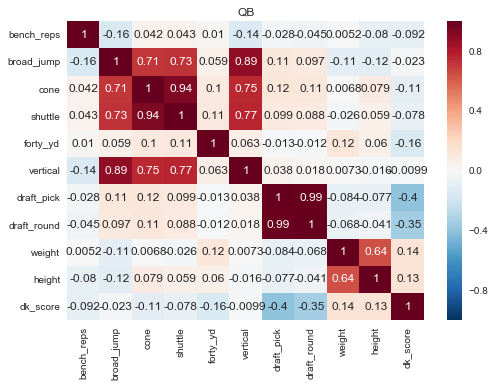

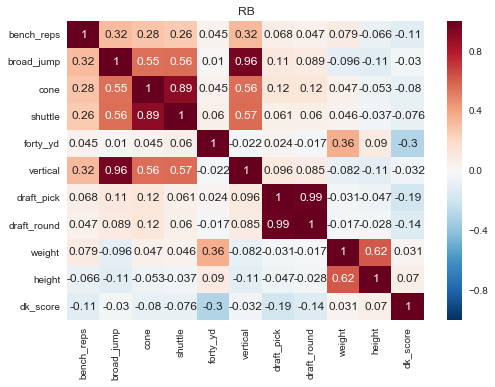

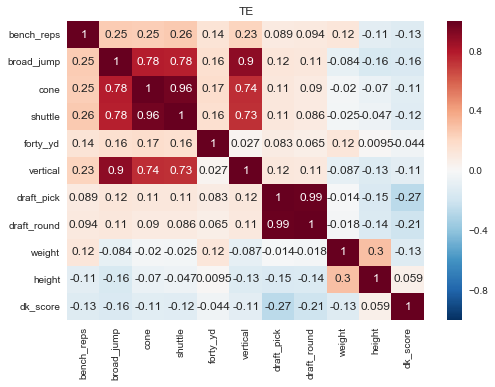

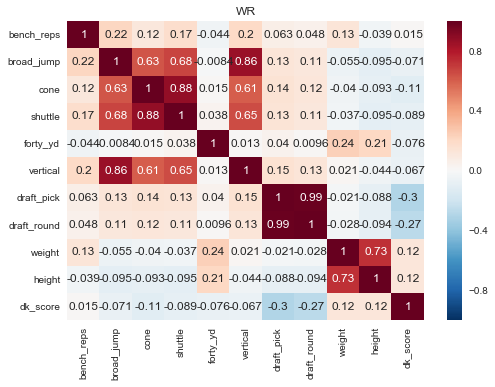

In [16]:
import seaborn as sns
i=0
for position,pos_df in df.groupby("position"):
    if len(pos_df)<5:
        continue
    plt.figure(i)
    i+=1
    plt.title(position)
    sns.heatmap(pos_df.corr(), annot=True)

Train a quick model that can handle highly correlated features. GBM with max-depth 3? Output significant feature pairs. 

In [21]:
import xgboost as xgb

C:\Users\Roger\Anaconda2\envs\py3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
filtered_df=scored_df[(scored_df['dk_score']>0)&(scored_df['draft_round']>0)]
filtered_df.head(3)

,player_id,name,position,bench_reps,broad_jump,cone,shuttle,forty_yd,vertical,draft_pick,draft_round,weight,height,dk_score,10_yd
0,AbduAm00,Ameer Abdullah,RB,24.0,130.0,6.79,3.95,4.60,42.5,54.0,2.0,205,69.0,121.0,UNK
2,AdamDa01,Davante Adams,WR,14.0,123.0,6.82,4.30,4.56,39.5,53.0,2.0,212,73.0,103.6,UNK
3,AdamJe01,Jerell Adams,TE,0.0,117.0,7.05,4.31,4.64,32.5,184.0,6.0,247,77.0,34.2,UNK


In [23]:
from sklearn import preprocessing
from sklearn import metrics
def scoreXGB(data,params={'max_depth':3},new_features=[]):
    param = {'max_depth':3}#, "objective":"reg:logistic"}#change target to greater than the position average [0, 1] if using logistic
    num_rounds=50
    features=['position_label','weight','forty_yd',"height",'bench_reps','broad_jump','cone','shuttle','vertical']
    features+=new_features
    target="dk_score"
    le = preprocessing.LabelEncoder()
    le.fit(data['position'])
    data['position_label']=le.transform(data['position'])
    train_percent=.5
    msk = np.random.rand(len(data)) < train_percent
    train_df=data[msk]
    test_df=data[~msk]
    dtrain=xgb.DMatrix(train_df[features], label=train_df[target])
    dtest=xgb.DMatrix(test_df[features], label=test_df[target])
    bst = xgb.train(param, dtrain, num_rounds)
    #print(bst.get_score())
    trained_predictions=bst.predict(dtrain)
    test_predictions=bst.predict(dtest)
    train_accuracy=metrics.r2_score(dtrain.get_label(), trained_predictions)
    test_accuracy=metrics.r2_score(dtest.get_label(), test_predictions)
    return train_accuracy,test_accuracy
sample_runs=100
training_results=[]
for i in range(sample_runs):
    training_results.append(scoreXGB(filtered_df)+scoreXGB(filtered_df,new_features=['draft_pick','draft_round']))
training_results_df=pd.DataFrame(training_results,columns=["Combine Train","Combine Test", "With Draft Train","With Draft Test"])

C:\Users\Roger\Anaconda2\envs\py3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
training_results_df.describe()

,Combine Train,Combine Test,With Draft Train,With Draft Test
count,100.000000,100.000000,100.000000,100.000000
mean,0.684649,-0.133275,0.782338,0.111612
std,0.026387,0.068448,0.025464,0.057020
min,0.615146,-0.486762,0.707140,-0.062083
25%,0.666961,-0.174056,0.764610,0.079474
50%,0.688018,-0.127275,0.786879,0.115748
75%,0.702696,-0.088805,0.800744,0.149760
max,0.765838,-0.011517,0.830526,0.212243


### Linear Regression
Let's try a basic linear regression

QB
R-squarerd 0.630277531608


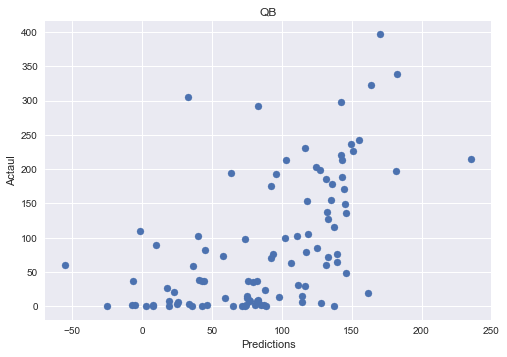

RB
R-squarerd 0.657441360459


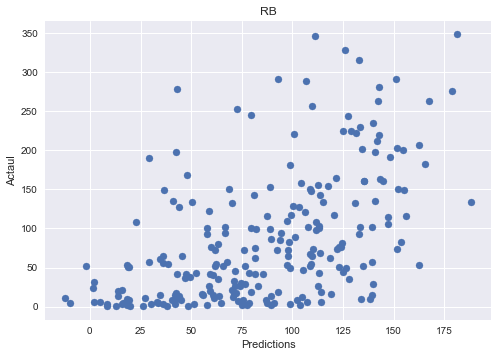

TE
R-squarerd 0.676148078331


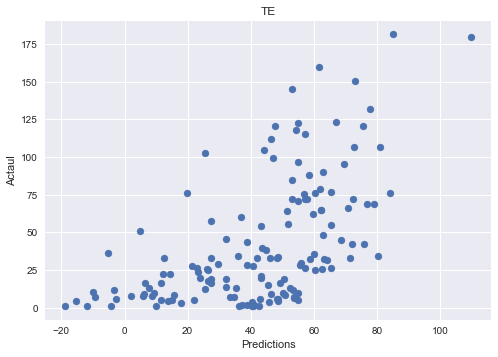

WR
R-squarerd 0.600481511018


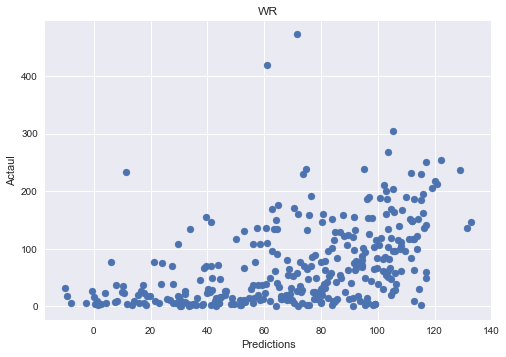

In [52]:
import statsmodels.api as sm
for pos, data in filtered_df.groupby("position"):
    if len(data)<5:
        continue
    X=np.asarray(data[['weight','forty_yd',"height",'bench_reps','broad_jump','cone','shuttle','vertical','draft_pick','draft_round']])
    y=np.asarray(data['dk_score'])
    model = sm.OLS(y,X)
    results = model.fit()
    print(pos)
    #print(results.summary())
    print("R-squarerd", results.rsquared)
    plt.scatter(results.predict(),data['dk_score'])
    plt.title(pos)
    plt.xlabel("Predictions")
    plt.ylabel("Actaul")
    plt.show()